In [3]:
# ---------------------------------------------------------
# XGBoost Binary Classification Example: Is the House Expensive? 💰🏡
# ---------------------------------------------------------
# 🧠 GOAL: Predict if a house is "expensive" (1) or "not expensive" (0)
# based on its features using a gradient-boosted decision tree classifier (XGBoost).
# This is a full pipeline — from data creation to model training and evaluation.
# We'll break down syntax, machine learning theory, and boosting internals as we go. 👇

# ---------------------------------------------------------
# 📦 IMPORTS: Tools and Libraries
# ---------------------------------------------------------

# numpy: Fundamental for array/matrix operations
import numpy as np

# pandas: Often used for tabular data manipulation (not used directly here, but essential in practice)
import pandas as pd

# matplotlib: To visualize the classification results
import matplotlib.pyplot as plt

# Scikit-learn utilities:
# - train_test_split: To split data into training and testing sets
# - accuracy_score: % of correct predictions
# - confusion_matrix: Shows TP, TN, FP, FN
# - classification_report: Precision, recall, F1-score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# XGBoostModel: Our custom wrapper (built around XGBClassifier)
from xgboost_module import XGBoostModel  # See your previously defined class

In [4]:
# ---------------------------------------------------------
# 🏗 STEP 1: Create Synthetic Housing Data
# ---------------------------------------------------------

np.random.seed(42)  # Ensures reproducible "random" values

# Number of synthetic house samples
n_samples = 100

# Generate random features:
# Each feature is a (100, 1) array (later stacked into a full dataset)
square_feet = np.random.randint(500, 3500, size=(n_samples, 1))   # Home size in sq ft
bedrooms    = np.random.randint(1, 6, size=(n_samples, 1))        # Number of bedrooms
bathrooms   = np.random.randint(1, 5, size=(n_samples, 1))        # Number of bathrooms
age         = np.random.randint(0, 51, size=(n_samples, 1))       # House age in years

# Stack features horizontally to form full feature matrix X (shape: [100, 4])
X = np.hstack([square_feet, bedrooms, bathrooms, age])

# 🔢 Build a synthetic target variable (price):
# Linear function: price = w₁x₁ + w₂x₂ + ... + noise
true_weights = np.array([150, 10000, 7000, -500]).reshape(-1, 1)

# Dot product: combines each feature vector with its weight
price = X.dot(true_weights)

# Add Gaussian noise to simulate real-world data imperfections
noise = np.random.normal(0, 10000, size=price.shape)
price_noisy = price + noise  # Final noisy price values

# 🎯 Binary Classification Target:
# - If price > 60th percentile, label as "expensive" (1)
# - Otherwise, label as "not expensive" (0)
threshold = np.percentile(price_noisy, 60)
y = (price_noisy > threshold).astype(int)  # Convert to binary class labels (0 or 1)

In [5]:
# ---------------------------------------------------------
# 🔀 STEP 2: Train/Test Split
# ---------------------------------------------------------

# Split data: 80% train, 20% test
# `random_state=42` ensures consistent shuffling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# ---------------------------------------------------------
# 🌳 STEP 3: Define and Train the XGBoost Classifier
# ---------------------------------------------------------

# 🧠 GRADIENT BOOSTING THEORY:
# - Boosting = combining many weak models (trees) into one strong model
# - Gradient Boosting = each new tree fits the residuals (errors) of the last prediction
# - Uses gradient descent on a loss function (like binary log loss)
# - Final model is:  F(x) = Σ (learning_rate × tree_predictions)

# 🛠️ XGBoost Enhancements:
# - L1/L2 regularization to avoid overfitting
# - Tree pruning for smaller/faster models
# - Parallelized training = fast
# - Can handle missing data
# - Early stopping and built-in cross-validation (if used)

# Initialize our model in classification mode
# This will use `XGBClassifier` under the hood
model = XGBoostModel(task="classification")

# Fit the model to the training data
# Behind the scenes:
# - Builds 100 decision trees (n_estimators=100)
# - Each one trained to reduce classification error
model.train(X_train, y_train)

c:\Users\Logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:18:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [7]:
# ---------------------------------------------------------
# 🧠 STEP 4: Predictions and Evaluation
# ---------------------------------------------------------

# Predict on the test set
# Output: an array of 0s and 1s (the predicted classes)
y_pred = model.predict(X_test)

# ✅ Accuracy: % of correct predictions
accuracy = accuracy_score(y_test, y_pred)

# 🧾 Confusion Matrix:
# Shows:
# [[TN FP]
#  [FN TP]]
conf_mat = confusion_matrix(y_test, y_pred)

# 📊 Classification Report:
# Precision = TP / (TP + FP)
# Recall    = TP / (TP + FN)
# F1-score  = harmonic mean of precision and recall
report = classification_report(y_test, y_pred)

# Print metrics to console
print(f"🎯 Accuracy: {accuracy:.4f}")
print("\n📊 Confusion Matrix:")
print(conf_mat)
print("\n🧾 Classification Report:")
print(report)

🎯 Accuracy: 0.9500

📊 Confusion Matrix:
[[11  1]
 [ 0  8]]

🧾 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



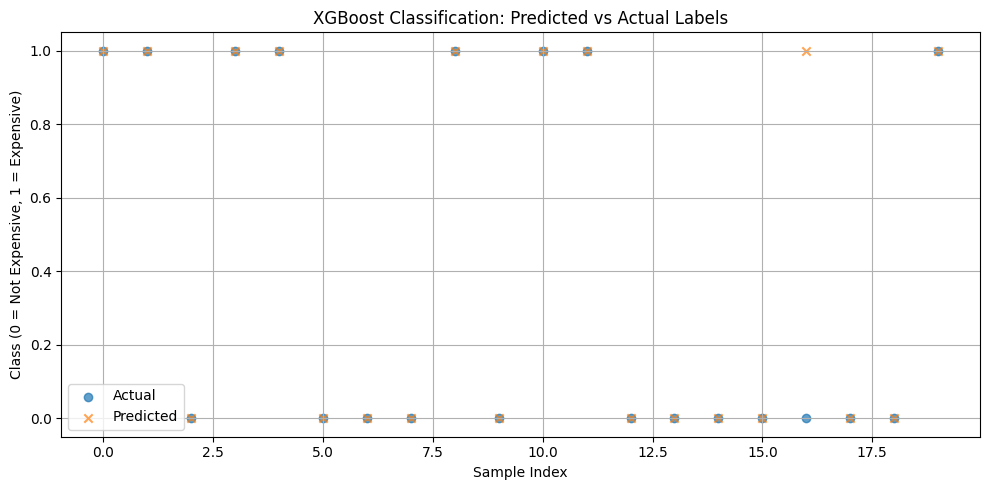

In [8]:
# ---------------------------------------------------------
# 📊 STEP 5: Visualize Predicted vs Actual Classes
# ---------------------------------------------------------

# Create a scatter plot comparing predicted and actual class labels
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label="Actual", marker='o', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", marker='x', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = Not Expensive, 1 = Expensive)")
plt.title("XGBoost Classification: Predicted vs Actual Labels")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
